## Name: Om Ravindra Misal
## Task2: Color Identification in an Images
# IoT & Computer Vision Internship
# The Sparks Foundation 

### Importing basic Necessary Libraries & Here we use KMeans Algorithm which is a part of sklearn's cluster package.

In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, deltaE_cie76

In [3]:
import matplotlib.pyplot as plt
from collections import Counter
import os

### To read image we use cv2.imread() method and to plot image using imshow() 

The type of this input is <class 'numpy.ndarray'>
Shape: (971, 1600, 3)


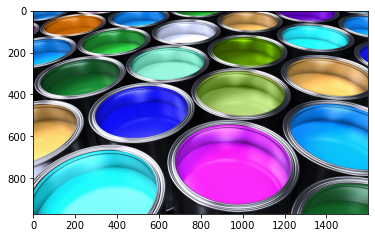

In [5]:
img = cv2.imread('C:/Users/Om Misal/Documents/IOT&COMPUTER_VISION_INTERNSHIP/TASK1/Color_Identification/variety-paints.jpg')
print("The type of this input is {}".format(type(img)))
print("Shape: {}".format(img.shape))
plt.imshow(img)

### By default, OpenCV reads the image in Blue-Green-Red(BGR) format, we have to convert it into Red-Green-Blue(RGB) format to get original image

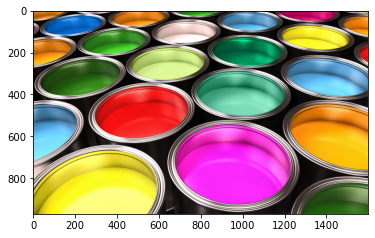

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### In Some cases, we want image in Black and White format so for that we are using following lines of codes for converting RGB image to Grayscale image

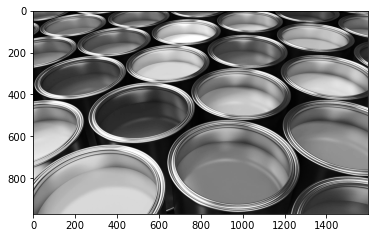

In [7]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

### Resizing the image

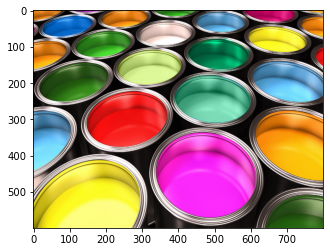

In [12]:
resized_img = cv2.resize(img, (800, 600))
plt.imshow(resized_img)

### RGB2HEX Conversion

In [13]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

## Read image in RGB color space
### First, we read the file using imread and then change its color space before returning it.

In [14]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

## Get colors from an image

In [25]:
def get_colors(image, number_of_colors, show_chart):
    # First, we resize the image to the size 800 x 600.KMeans expects the input to be of two dimensions, 
    #so we use Numpy’s reshape function to reshape the image data.
    modified_image = cv2.resize(image, (800, 600), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    #KMeans algorithm creates clusters based on the supplied count of clusters. In our case, it will form clusters of colors
    #and these clusters will be our top colors. We then fit and predict on the same image to extract the prediction
    #into the variable labels.
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    #We use Counter to get count of all labels
    counts = Counter(labels)
    # sort to ensure correct color percentage
    #counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

#### Now we call this method as get_colors(get_image(‘C:/Users/Om Misal/Documents/IOT&COMPUTER_VISION_INTERNSHIP/TASK1/Color_Identification/variety-paints.jpg’), 10, True) and our pie chart appears with top 10 colors of the image.

[array([155.3131247 , 144.67155521, 130.00847811]),
 array([239.4591094 , 246.91044031, 124.21472918]),
 array([218.31602642,  53.0912955 ,  33.99794328]),
 array([17.04611042, 14.42001928, 12.90556244]),
 array([ 49.94525275, 135.8211513 , 144.30962102]),
 array([114.00465389, 200.789436  , 218.44377909]),
 array([240.52216218, 200.33483353,  31.57217565]),
 array([56.48669944, 83.13633536, 46.63301175]),
 array([245.75272139,  49.26729006, 231.52614994]),
 array([235.59785882, 227.90585882, 226.39534118])]

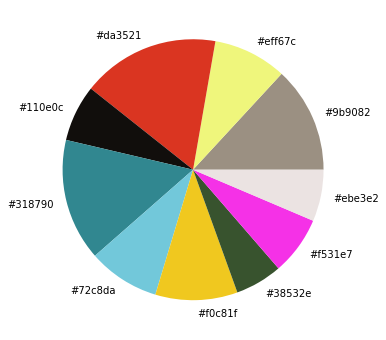

In [28]:
get_colors(get_image('C:/Users/Om Misal/Documents/IOT&COMPUTER_VISION_INTERNSHIP/TASK1/Color_Identification/variety-paints.jpg'), 10, True)

### Here we identify the colors in an image in the form of pie chart.
# Thank You :)